#   Telecom churn project

# Data description :

Telecom customer churn prediction

This data set consists of 20 variables and approx 2666 records. This data set contains different variables explaining the attributes of telecom industry and various factors considered important while dealing with customers of telecom industry. The target variable here is churn which explains whether the customer will churn or not. We can use this data set to predict the customers who would churn or who wouldn't churn depending on various variables available.



# Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats; from scipy.stats import zscore, norm, randint



In [2]:
data = pd.read_csv('churn-bigml-80.csv')

In [3]:
data.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [4]:
data.shape

(2666, 20)

#Obesevation 1: 

Dataset has 2666 rows and 20 columns

#  Target feature analysis

In [5]:
data['Churn'].value_counts()

False    2278
True      388
Name: Churn, dtype: int64

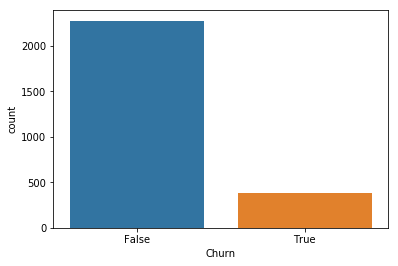

In [6]:
sns.countplot(x ='Churn', data = data)
plt.show()

In [7]:
data_ser = data['Churn'].value_counts(normalize = True)*100

In [8]:
label = (np.array(data_ser.index))
sizes = (np.array((data_ser/ data_ser.sum()) *100))
colors = ['gold', 'lightskyblue']

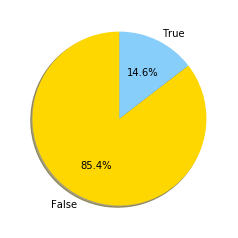

In [9]:
plt.pie(sizes, labels= label, colors=colors, autopct ='%1.1f%%', shadow=True, startangle=90)
plt.show()

observation 2:
 * Target feature :
  * Categorical
  * Target: Binary. Most occurring value being 'False' i.e. 85.4% where the customers didn't churn.

# Exploratory Data Analysis

* Get descriptive statistics including five point summary

* Check unique values in object columns

* Count plot by Target for categorical columns (State , International plan , Voice mail plan)

* check distribution of Numerical columns


# Descriptive Statistics

In [10]:
data.describe().T

count        mean        std     min       25%  \
Account length          2666.0  100.620405  39.563974    1.00   73.0000   
Area code               2666.0  437.438860  42.521018  408.00  408.0000   
Number vmail messages   2666.0    8.021755  13.612277    0.00    0.0000   
Total day minutes       2666.0  179.481620  54.210350    0.00  143.4000   
Total day calls         2666.0  100.310203  19.988162    0.00   87.0000   
Total day charge        2666.0   30.512404   9.215733    0.00   24.3800   
Total eve minutes       2666.0  200.386159  50.951515    0.00  165.3000   
Total eve calls         2666.0  100.023631  20.161445    0.00   87.0000   
Total eve charge        2666.0   17.033072   4.330864    0.00   14.0500   
Total night minutes     2666.0  201.168942  50.780323   43.70  166.9250   
Total night calls       2666.0  100.106152  19.418459   33.00   87.0000   
Total night charge      2666.0    9.052689   2.285120    1.97    7.5125   
Total intl minutes      2666.0   10.237022   2.788349    0.00    8.5000   
Total intl calls        2666.0    4.467367   2.456195    0.00    3.0000   
Total intl charge       2666.0    2.764490   0.752812    0.00    2.3000   
Customer service calls  2666.0    1.562641   1.311236    0.00    1.0000   

                           50%      75%     max  
Account length          100.00  127.000  243.00  
Area code               415.00  510.000  510.00  
Number vmail messages     0.00   19.000   50.00  
Total day minutes       179.95  215.900  350.80  
Total day calls         101.00  114.000  160.00  
Total day charge         30.59   36.700   59.64  
Total eve minutes       200.90  235.100  363.70  
Total eve calls         100.00  114.000  170.00  
Total eve charge         17.08   19.980   30.91  
Total night minutes     201.15  236.475  395.00  
Total night calls       100.00  113.000  166.00  
Total night charge        9.05   10.640   17.77  
Total intl minutes       10.20   12.100   20.00  
Total intl calls          4.00    6.000   20.00  
Total intl charge         2.75    3.270    5.40  
Customer service calls    1.00    2.000    9.00

In [11]:
#finding the categorical columns
cat_col = [col for col in data.columns if data[col].dtypes =='O' ]

In [12]:
cat_col

['State', 'International plan', 'Voice mail plan']

In [13]:
len(cat_col)

3

In [14]:
#finding the integer columns
int_col = [col for col in data.columns if data[col].dtypes!='O' ]

In [15]:
int_col

['Account length',
 'Area code',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls',
 'Churn']

In [16]:
len(int_col)

17

Observation 3 - Count of both numerical and categorical columns
   * Categorical : 3   
   
   
   ['State', 'International plan', 'Voice mail plan']
   
   
   * numerical   :15 (not including Area code and Account length) 
   
   
 ['Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls']
   
observation 4 - Descriptive Statistics for numerical variables
* Descriptive statistics for the numerical variables ('Number vmail messages',
  'Total day minutes',
  'Total day calls',
  'Total day charge',
  'Total eve minutes',
  'Total eve calls',
  'Total eve charge',
  'Total night minutes',
  'Total night calls',
  'Total night charge',
  'Total intl minutes',
  'Total intl calls',
  'Total intl charge',
  'Customer service calls')
  
  
  * Total day minutes: Range of Q1 to Q3 is between 143 to 213.5. Since mean is equal to median normallly  distributed.
  * Total day calls: Range of Q1 to Q3 is between 87 to 114. Since mean is almost equal to median, we can say that feature is normally distributed
  * Total day charge: Range of Q1 to Q3 is between 24.3 to 36.7. Since mean is equal to median, we can say that feature is normally distributed.
  * Total eve minutes: Range of Q1 to Q3 is between 165.3 to 265.1. Since mean is equal to median, we can say that feature is normally distributed.
  * Total eve calls: Range of Q1 to Q3 is between 87 to 114. Since mean is almost equal to median, we can say that feature is normally distributed.
  * Total eve charge: Range of Q1 to Q3 is between 24.3 to 36.7. Since mean is equal to median, we can say that feature is normally distributed.
  * Total night minutes: Range of Q1 to Q3 is between 166.9 to 236.4. Since mean is equal to median, we can say that  feature is normally distributed.
  * Total night calls: Range of Q1 to Q3 is between 87 to 113. Since mean is greater than median, we can say that  is right (positively) skewed.
  * Total night charge: Range of Q1 to Q3 is between 7.5 to 10.6. Since mean is greater than median, we can say that  is right (positively) skewed.
  * Total intl minutes: Range of Q1 to Q3 is between 8.5 to 12.5. Since mean is equal to median, we can say that  is feature is normally distributed.
  * Total intl calls: Range of Q1 to Q3 is between 3 to 6. Since mean is greater than median, we can say that  is right skewed.
  * Total intl charge: Range of Q1 to Q3 is between 2.3 to 3.2. Since mean is less than median, we can say that  is left  skewed.
  * Customer service calls: Range of Q1 to Q3 is between 1 to 2. Since mean is greater than median, we can say that  is right (positively) skewed.
  

# unique values in 'object' columns

In [17]:
# Cardinality 
columns = data.loc[:, data.dtypes == 'object'].columns.tolist()
for cols in columns:
    print(f'Unique values for {cols} is \n{data[cols].unique()}\n')
    col_len=data[cols].unique()
    print(f'{len(col_len)}\n')

Unique values for State is 
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'WV' 'RI' 'IA' 'MT' 'ID' 'VT' 'VA'
 'TX' 'FL' 'CO' 'AZ' 'NE' 'WY' 'IL' 'NH' 'LA' 'GA' 'AK' 'MD' 'AR' 'WI'
 'OR' 'DE' 'IN' 'UT' 'CA' 'SD' 'NC' 'WA' 'MN' 'NM' 'NV' 'DC' 'NY' 'KY'
 'ME' 'MS' 'MI' 'SC' 'TN' 'PA' 'HI' 'ND' 'CT']

51

Unique values for International plan is 
['No' 'Yes']

2

Unique values for Voice mail plan is 
['Yes' 'No']

2



# Categorical feature  relationship with the target feature

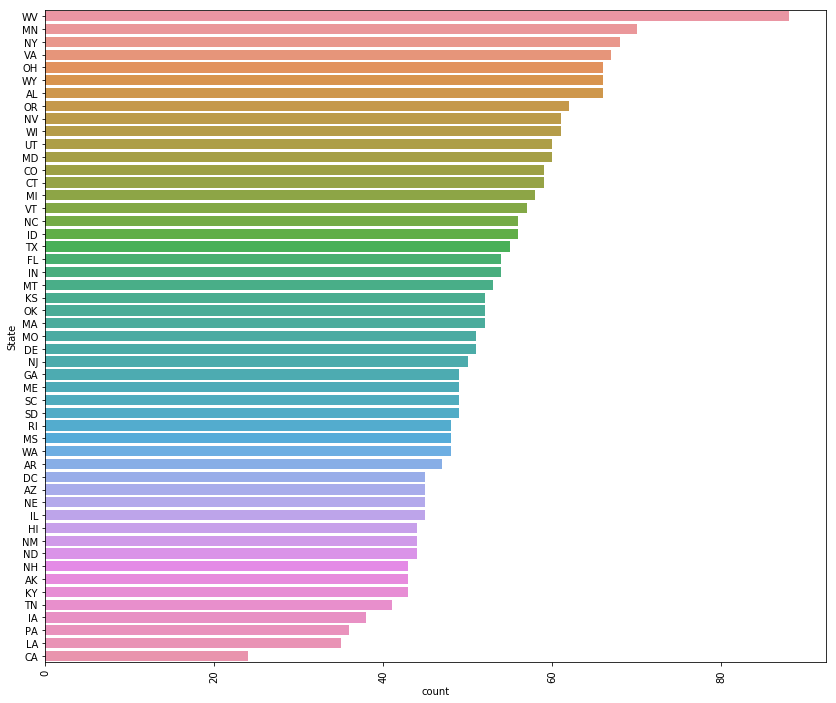

In [18]:
# State feature count plot
plt.figure(figsize=(14,12))
sns.countplot(y='State', data=data,order=data['State'].value_counts(ascending = False).index)
plt.xticks(rotation='vertical')
plt.show()

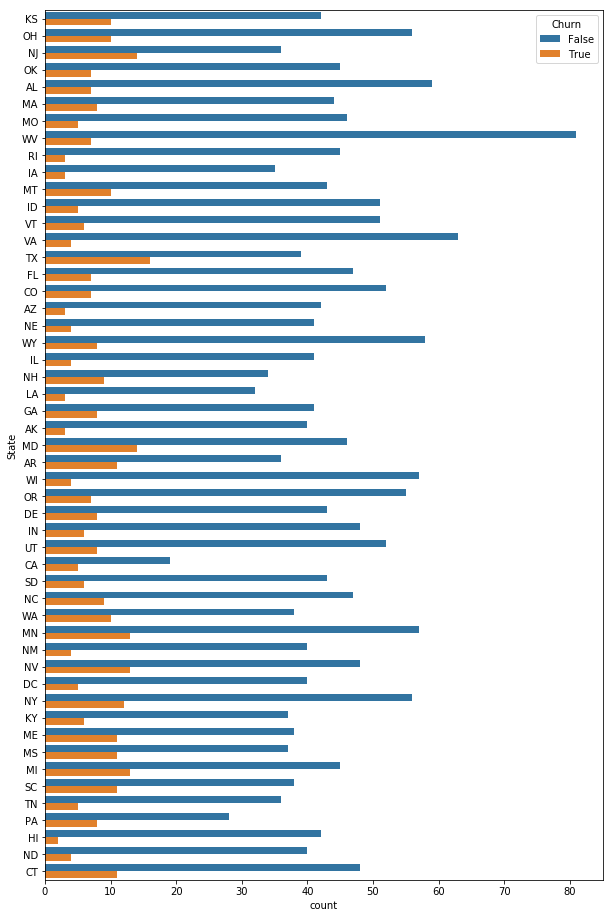

In [19]:
plt.figure(figsize=(10,16))
sns.countplot(y='State',hue='Churn',data=data)
plt.show()

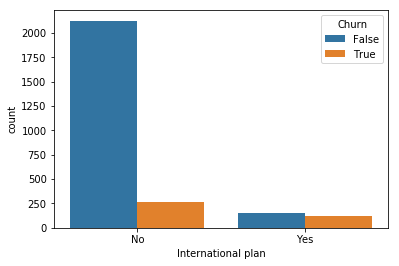

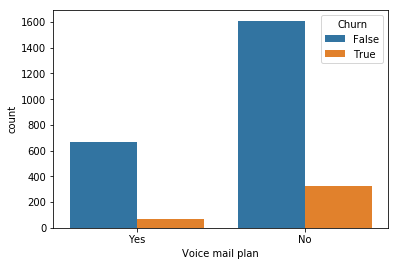

In [20]:
for col in cat_col[1:]:
    sns.countplot(x=col,hue='Churn',data=data)
    plt.show()

Observation 5 - Comments from categorical columns
 * Customers having No international plan are less likey to churn compared with customers having internationa plan
 * Customers having No voice mail plan are less likey to churn compared with customers having voice mail plan
  


# Numerical column distribution

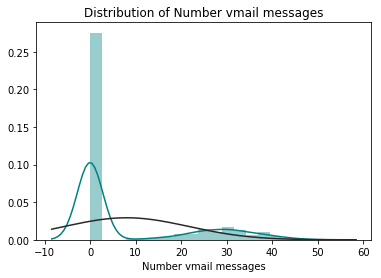

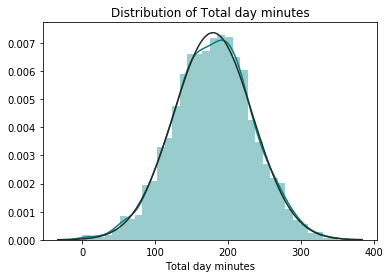

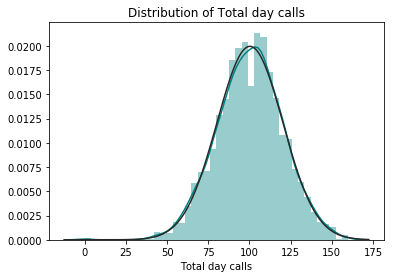

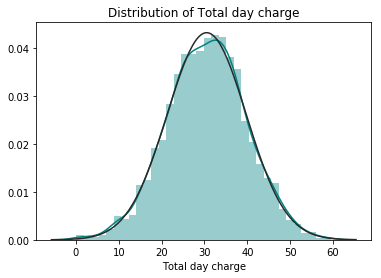

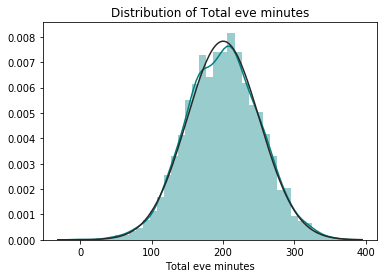

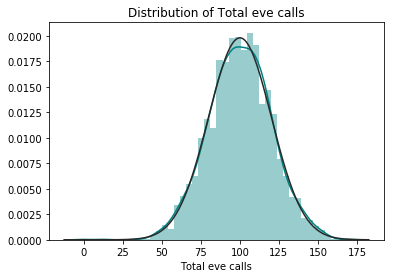

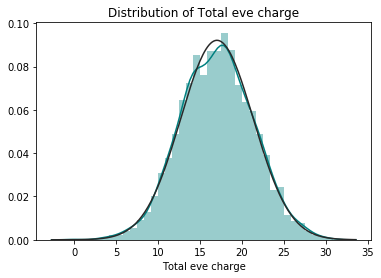

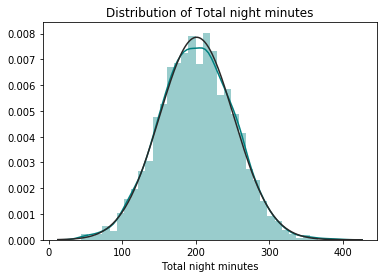

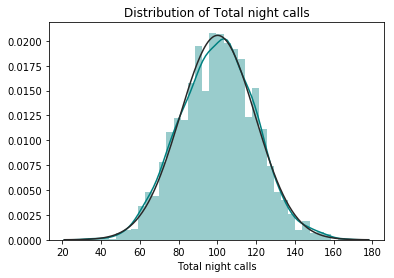

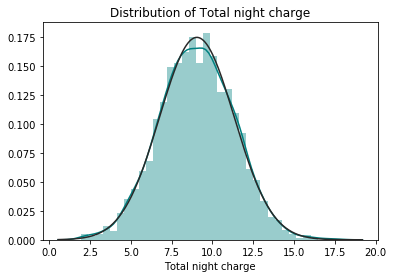

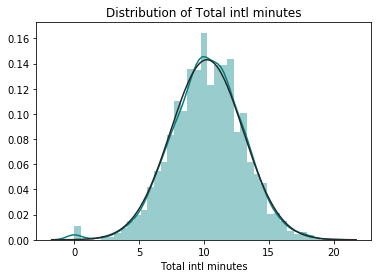

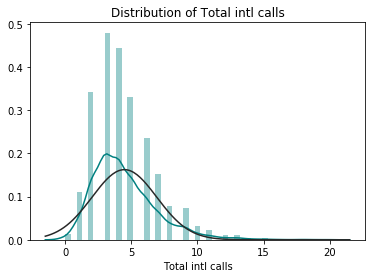

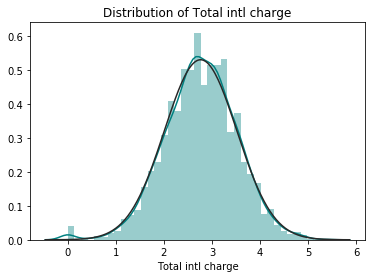

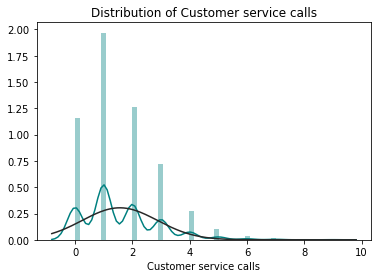

In [21]:
for col in int_col[2:-1]:
    sns.distplot(data[col], color = 'teal', fit = norm).set_title(f'Distribution of {col}')
    plt.show()

# Feature Engineering

#  Removing unwanted features

In [22]:
# columns that are dropped
data = data.drop(['Account length','Area code'],axis=1)

In [23]:
data.shape

(2666, 18)

In [24]:
data.head()

State International plan Voice mail plan  Number vmail messages  \
0    KS                 No             Yes                     25   
1    OH                 No             Yes                     26   
2    NJ                 No              No                      0   
3    OH                Yes              No                      0   
4    OK                Yes              No                      0   

   Total day minutes  Total day calls  Total day charge  Total eve minutes  \
0              265.1              110             45.07              197.4   
1              161.6              123             27.47              195.5   
2              243.4              114             41.38              121.2   
3              299.4               71             50.90               61.9   
4              166.7              113             28.34              148.3   

   Total eve calls  Total eve charge  Total night minutes  Total night calls  \
0               99             16.78                244.7                 91   
1              103             16.62                254.4                103   
2              110             10.30                162.6                104   
3               88              5.26                196.9                 89   
4              122             12.61                186.9                121   

   Total night charge  Total intl minutes  Total intl calls  \
0               11.01                10.0                 3   
1               11.45                13.7                 3   
2                7.32                12.2                 5   
3                8.86                 6.6                 7   
4                8.41                10.1                 3   

   Total intl charge  Customer service calls  Churn  
0               2.70                       1  False  
1               3.70                       1  False  
2               3.29                       0  False  
3               1.78                       2  False  
4               2.73                       3  False

Observation 6 -  Dropped  features  ['Account length','Area code']
 * These features doesn't require for model building.

#  Handling Missing values 

In [25]:
data.isnull().sum()

State                     0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

Observation 7 - Missing values
  * There are no missing values .

#  Outliers 

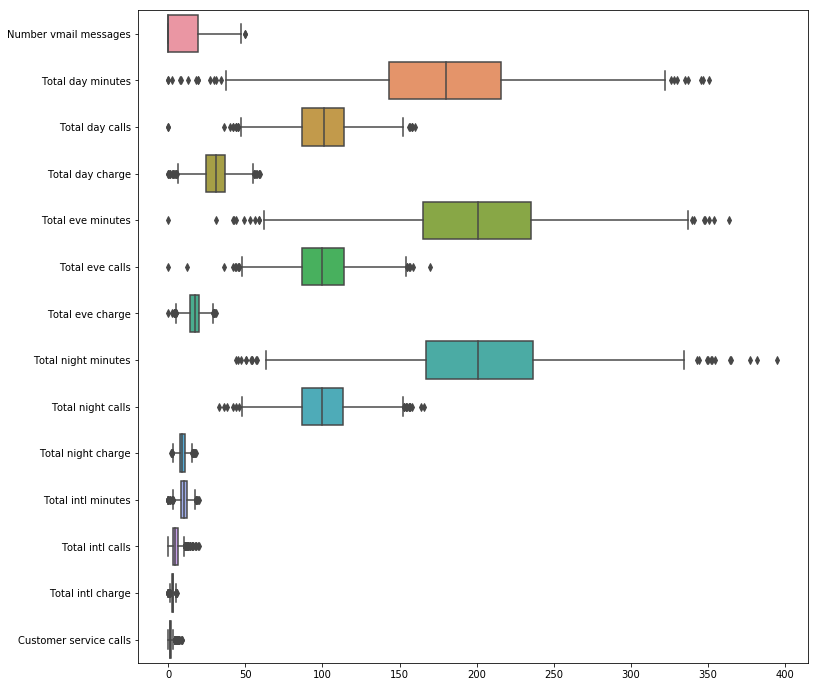

In [26]:
# A quick check to find columns that contain outliers
fig = plt.figure(figsize = (12, 12))
ax = sns.boxplot(data = data[int_col[2:-1]], orient = 'h')


In [27]:
def odp_plots(df, col):
    f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 7.2))
    
    # Boxplot to check outliers
    sns.boxplot(x = col, data = df, ax = ax1, orient = 'v', color = 'darkslategrey')
    
    # Distribution plot with outliers
    sns.distplot(df[col], ax = ax2, color = 'teal', fit = norm, rug = True).set_title(f'{col} with outliers')
    ax2.axvline(df[col].mean(), color = 'r', linestyle = '--', label = 'Mean', linewidth = 1.2)
    ax2.axvline(df[col].median(), color = 'g', linestyle = '--', label = 'Median', linewidth = 1.2)
    ax2.axvline(df[col].mode()[0], color = 'b', linestyle = '--', label = 'Mode', linewidth = 1.2); ax2.legend(loc = 'best')
    
    # Removing outliers, but in a new dataframe
    upperbound, lowerbound = np.percentile(df[col], [1, 99])
    y = pd.DataFrame(np.clip(df[col], upperbound, lowerbound))
    
    # Distribution plot without outliers
    sns.distplot(y[col], ax = ax3, color = 'tab:orange', fit = norm, rug = True).set_title(f'{col} without outliers')
    ax3.axvline(y[col].mean(), color = 'r', linestyle = '--', label = 'Mean', linewidth = 1.2)
    ax3.axvline(y[col].median(), color = 'g', linestyle = '--', label = 'Median', linewidth = 1.2)
    ax3.axvline(y[col].mode()[0], color = 'b', linestyle = '--', label = 'Mode', linewidth = 1.2); ax3.legend(loc = 'best')
    
    kwargs = {'fontsize':14, 'color':'black'}
    ax1.set_title(col + ' Boxplot Analysis', **kwargs)
    ax1.set_xlabel('Box', **kwargs)
    ax1.set_ylabel(col + ' Values', **kwargs)

    return plt.show()

Box plot, distribution of columns with and without outliers
------------------------------------------------------------------------------------------------------------------------
Number vmail messages column --------------------------------------------------------------------------------
Number of rows with outliers: 2


State International plan Voice mail plan  Number vmail messages  \
2188    WV                 No             Yes                     50   
2323    OR                 No             Yes                     50   

      Total day minutes  Total day calls  Total day charge  Total eve minutes  \
2188              186.5               94             31.71              178.0   
2323              208.8              130             35.50              132.9   

      Total eve calls  Total eve charge  Total night minutes  \
2188              106             15.13                215.6   
2323              104             11.30                136.7   

      Total night calls  Total night charge  Total intl minutes  \
2188                100                9.70                12.1   
2323                107                6.15                11.1   

      Total intl calls  Total intl charge  Customer service calls  Churn  
2188                 4               3.27                       2  False  
2323                 4               3.00                       2  False

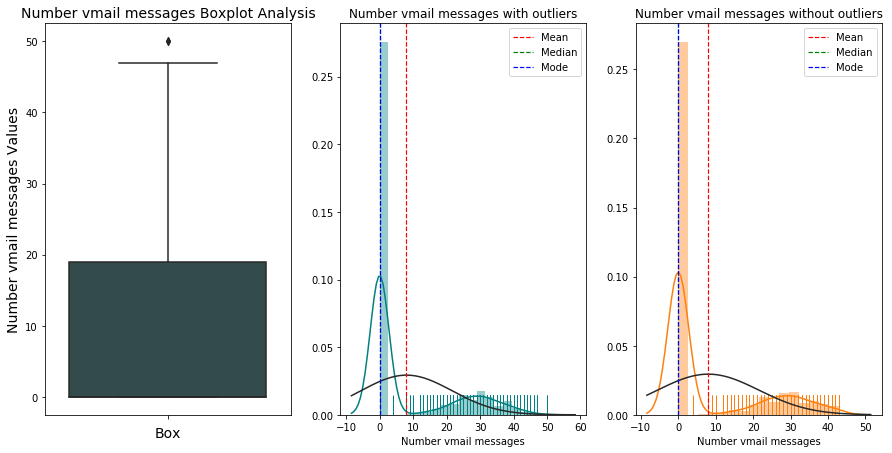

Total day minutes column --------------------------------------------------------------------------------
Number of rows with outliers: 21


State International plan Voice mail plan  Number vmail messages  \
128    OH                 No              No                      0   
296    CO                 No              No                      0   
485    MO                 No              No                      0   
540    CO                 No             Yes                     32   
582    NE                 No              No                      0   

     Total day minutes  Total day calls  Total day charge  Total eve minutes  \
128              337.4              120             57.36              227.4   
296              350.8               75             59.64              216.5   
485              335.5               77             57.04              212.5   
540               30.9              113              5.25              187.0   
582               34.0              133              5.78              278.6   

     Total eve calls  Total eve charge  Total night minutes  \
128              116             19.33                153.9   
296               94             18.40                253.9   
485              109             18.06                265.0   
540              113             15.90                230.8   
582               61             23.68                129.6   

     Total night calls  Total night charge  Total intl minutes  \
128                114                6.93                15.8   
296                100               11.43                10.1   
485                132               11.93                12.7   
540                101               10.39                 8.6   
582                120                5.83                11.5   

     Total intl calls  Total intl charge  Customer service calls  Churn  
128                 7               4.27                       0   True  
296                 9               2.73                       1   True  
485                 8               3.43                       2   True  
540                 7               2.32                       1  False  
582                 3               3.11                       0  False

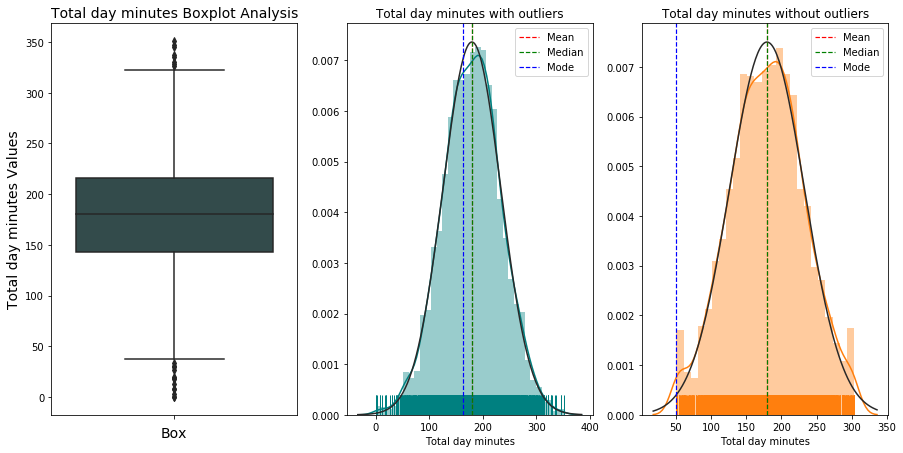

Total day calls column --------------------------------------------------------------------------------
Number of rows with outliers: 18


State International plan Voice mail plan  Number vmail messages  \
252     MA                 No              No                      0   
544     NE                 No              No                      0   
581     UT                 No             Yes                     20   
836     WV                 No             Yes                     38   
1040    DE                Yes              No                      0   

      Total day minutes  Total day calls  Total day charge  Total eve minutes  \
252                60.4              158             10.27              306.2   
544               185.8               36             31.59              276.5   
581               230.6               40             39.20              189.1   
836               123.0              158             20.91              133.9   
1040              132.1               42             22.46              138.9   

      Total eve calls  Total eve charge  Total night minutes  \
252               120             26.03                123.9   
544               134             23.50                192.1   
581                58             16.07                162.2   
836               119             11.38                138.2   
1040               88             11.81                192.6   

      Total night calls  Total night charge  Total intl minutes  \
252                  46                5.58                12.4   
544                 104                8.64                 5.7   
581                 115                7.30                 9.4   
836                 103                6.22                13.3   
1040                119                8.67                 9.1   

      Total intl calls  Total intl charge  Customer service calls  Churn  
252                  3               3.35                       1  False  
544                  7               1.54                       4  False  
581                  2               2.54                       1  False  
836                  4               3.59                       1  False  
1040                 1               2.46                       2   True

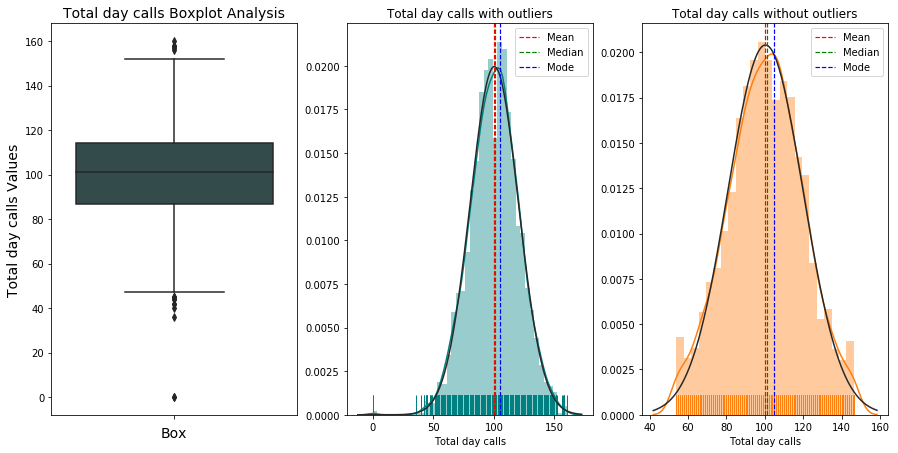

Total day charge column --------------------------------------------------------------------------------
Number of rows with outliers: 21


State International plan Voice mail plan  Number vmail messages  \
128    OH                 No              No                      0   
296    CO                 No              No                      0   
485    MO                 No              No                      0   
540    CO                 No             Yes                     32   
582    NE                 No              No                      0   

     Total day minutes  Total day calls  Total day charge  Total eve minutes  \
128              337.4              120             57.36              227.4   
296              350.8               75             59.64              216.5   
485              335.5               77             57.04              212.5   
540               30.9              113              5.25              187.0   
582               34.0              133              5.78              278.6   

     Total eve calls  Total eve charge  Total night minutes  \
128              116             19.33                153.9   
296               94             18.40                253.9   
485              109             18.06                265.0   
540              113             15.90                230.8   
582               61             23.68                129.6   

     Total night calls  Total night charge  Total intl minutes  \
128                114                6.93                15.8   
296                100               11.43                10.1   
485                132               11.93                12.7   
540                101               10.39                 8.6   
582                120                5.83                11.5   

     Total intl calls  Total intl charge  Customer service calls  Churn  
128                 7               4.27                       0   True  
296                 9               2.73                       1   True  
485                 8               3.43                       2   True  
540                 7               2.32                       1  False  
582                 3               3.11                       0  False

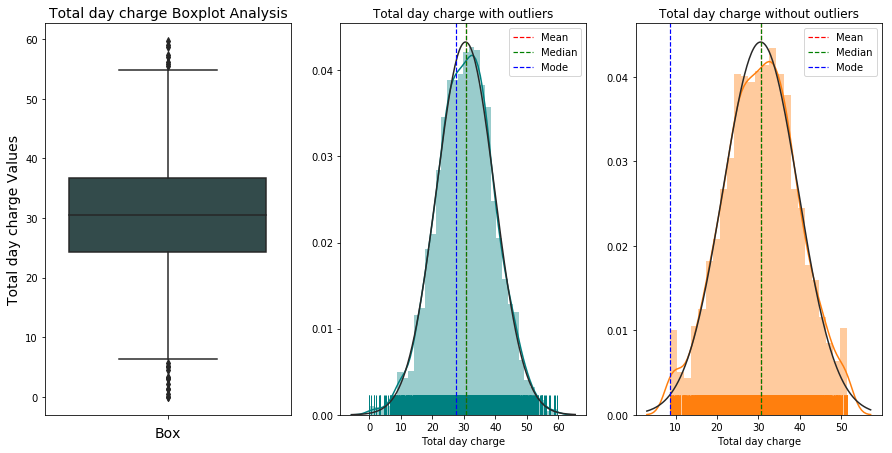

Total eve minutes column --------------------------------------------------------------------------------
Number of rows with outliers: 17


State International plan Voice mail plan  Number vmail messages  \
6      MA                 No             Yes                     24   
27     LA                 No              No                      0   
429    OK                 No             Yes                     36   
465    IN                 No              No                      0   
472    NH                 No              No                      0   

     Total day minutes  Total day calls  Total day charge  Total eve minutes  \
6                218.2               88             37.09              348.5   
27               212.0              121             36.04               31.2   
429              201.3              117             34.22               42.2   
465              209.4              151             35.60              347.3   
472              169.6               85             28.83               58.9   

     Total eve calls  Total eve charge  Total night minutes  \
6                108             29.62                212.6   
27               115              2.65                293.3   
429               78              3.59                125.7   
465              113             29.52                246.0   
472               86              5.01                179.3   

     Total night calls  Total night charge  Total intl minutes  \
6                  118                9.57                 7.5   
27                  78               13.20                12.6   
429                104                5.66                 5.4   
465                116               11.07                 7.4   
472                124                8.07                 7.4   

     Total intl calls  Total intl charge  Customer service calls  Churn  
6                   7               2.03                       3  False  
27                 10               3.40                       3  False  
429                 3               1.46                       1  False  
465                 2               2.00                       1   True  
472                 8               2.00                       1  False

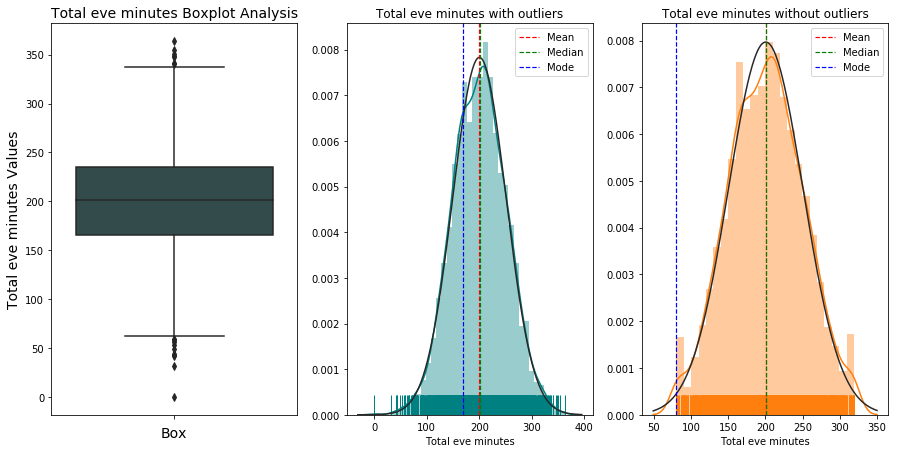

Total eve calls column --------------------------------------------------------------------------------
Number of rows with outliers: 15


State International plan Voice mail plan  Number vmail messages  \
126    OK                 No              No                      0   
382    AR                 No              No                      0   
760    AR                 No              No                      0   
808    HI                 No             Yes                     33   
991    IA                 No              No                      0   

     Total day minutes  Total day calls  Total day charge  Total eve minutes  \
126              260.4              115             44.27              146.0   
382              148.5              111             25.25              146.5   
760              199.2              106             33.86              187.3   
808              145.0               72             24.65              194.5   
991              155.4              127             26.42              164.1   

     Total eve calls  Total eve charge  Total night minutes  \
126               46             12.41                269.5   
382               42             12.45                289.2   
760               12             15.92                214.0   
808              157             16.53                242.3   
991               45             13.95                157.7   

     Total night calls  Total night charge  Total intl minutes  \
126                 87               12.13                11.5   
382                 83               13.01                 9.9   
760                 85                9.63                13.3   
808                138               10.90                14.2   
991                128                7.10                 9.0   

     Total intl calls  Total intl charge  Customer service calls  Churn  
126                 4               3.11                       5  False  
382                 6               2.67                       3  False  
760                 3               3.59                       3  False  
808                 3               3.83                       2  False  
991                 3               2.43                       0  False

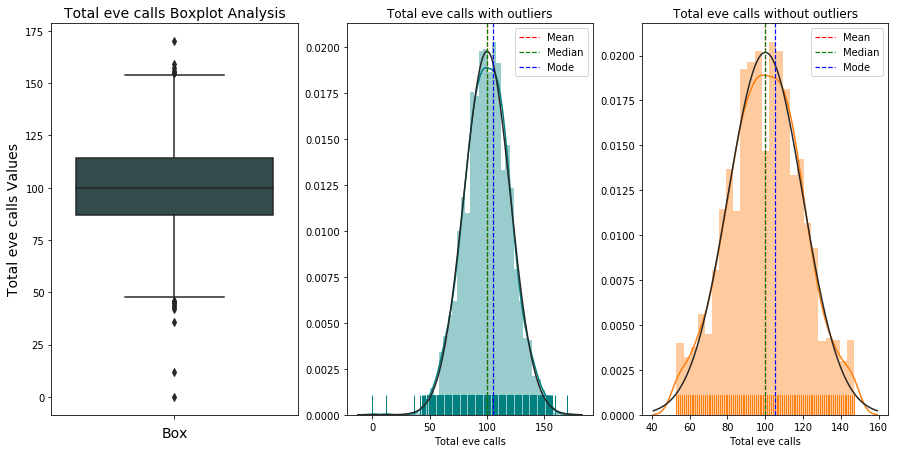

Total eve charge column --------------------------------------------------------------------------------
Number of rows with outliers: 17


State International plan Voice mail plan  Number vmail messages  \
6      MA                 No             Yes                     24   
27     LA                 No              No                      0   
429    OK                 No             Yes                     36   
465    IN                 No              No                      0   
472    NH                 No              No                      0   

     Total day minutes  Total day calls  Total day charge  Total eve minutes  \
6                218.2               88             37.09              348.5   
27               212.0              121             36.04               31.2   
429              201.3              117             34.22               42.2   
465              209.4              151             35.60              347.3   
472              169.6               85             28.83               58.9   

     Total eve calls  Total eve charge  Total night minutes  \
6                108             29.62                212.6   
27               115              2.65                293.3   
429               78              3.59                125.7   
465              113             29.52                246.0   
472               86              5.01                179.3   

     Total night calls  Total night charge  Total intl minutes  \
6                  118                9.57                 7.5   
27                  78               13.20                12.6   
429                104                5.66                 5.4   
465                116               11.07                 7.4   
472                124                8.07                 7.4   

     Total intl calls  Total intl charge  Customer service calls  Churn  
6                   7               2.03                       3  False  
27                 10               3.40                       3  False  
429                 3               1.46                       1  False  
465                 2               2.00                       1   True  
472                 8               2.00                       1  False

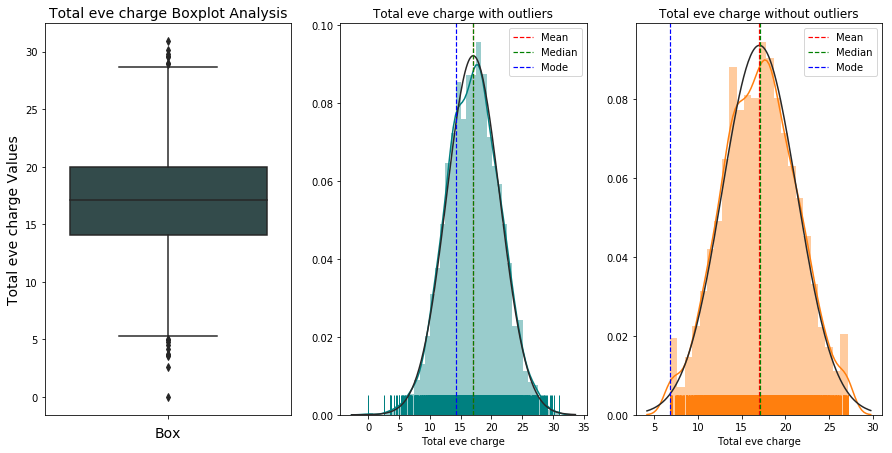

Total night minutes column --------------------------------------------------------------------------------
Number of rows with outliers: 22


State International plan Voice mail plan  Number vmail messages  \
94     NJ                 No              No                      0   
201    VA                 No              No                      0   
361    WI                Yes              No                      0   
698    WY                 No              No                      0   
729    PA                 No              No                      0   

     Total day minutes  Total day calls  Total day charge  Total eve minutes  \
94               162.6               83             27.64              152.3   
201              198.5               99             33.75              267.8   
361              165.4              107             28.12              196.0   
698              146.3               84             24.87              255.9   
729              215.9               67             36.70              217.0   

     Total eve calls  Total eve charge  Total night minutes  \
94               109             12.95                 57.5   
201               60             22.76                354.9   
361              126             16.66                349.2   
698              113             21.75                 45.0   
729              108             18.45                342.8   

     Total night calls  Total night charge  Total intl minutes  \
94                 122                2.59                14.2   
201                 75               15.97                 9.4   
361                110               15.71                 9.6   
698                117                2.03                 8.0   
729                130               15.43                 5.2   

     Total intl calls  Total intl charge  Customer service calls  Churn  
94                  3               3.83                       1  False  
201                 3               2.54                       0   True  
361                 7               2.59                       2  False  
698                12               2.16                       1  False  
729                 2               1.40                       1  False

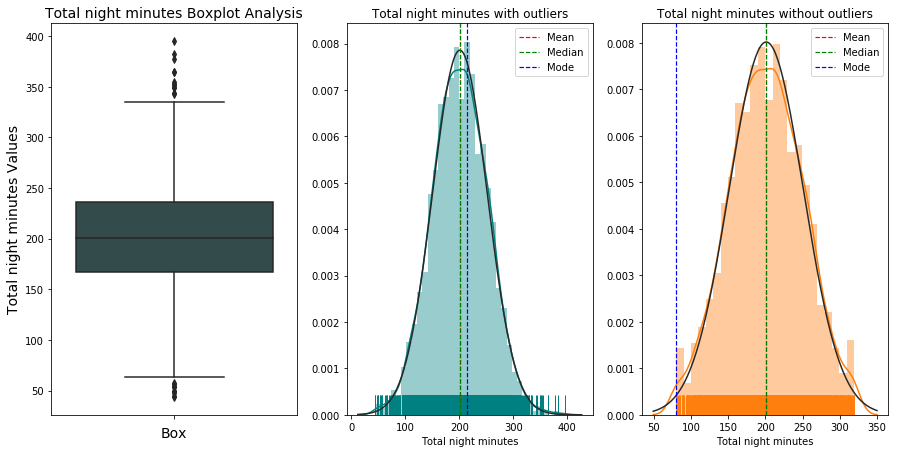

Total night calls column --------------------------------------------------------------------------------
Number of rows with outliers: 19


State International plan Voice mail plan  Number vmail messages  \
252    MA                 No              No                      0   
271    KY                 No             Yes                     17   
322    TN                 No             Yes                     22   
347    OR                 No              No                      0   
471    TX                Yes              No                      0   

     Total day minutes  Total day calls  Total day charge  Total eve minutes  \
252               60.4              158             10.27              306.2   
271              214.7               97             36.50              138.5   
322              278.3               89             47.31               93.4   
347              119.4               69             20.30              273.3   
471              221.8               97             37.71              203.8   

     Total eve calls  Total eve charge  Total night minutes  \
252              120             26.03                123.9   
271               90             11.77                169.1   
322              143              7.94                107.6   
347               92             23.23                214.4   
471              134             17.32                215.8   

     Total night calls  Total night charge  Total intl minutes  \
252                 46                5.58                12.4   
271                 44                7.61                 8.6   
322                 42                4.84                 9.7   
347                153                9.65                12.4   
471                154                9.71                 8.4   

     Total intl calls  Total intl charge  Customer service calls  Churn  
252                 3               3.35                       1  False  
271                 4               2.32                       1  False  
322                 5               2.62                       0  False  
347                 7               3.35                       2  False  
471                 4               2.27                       1  False

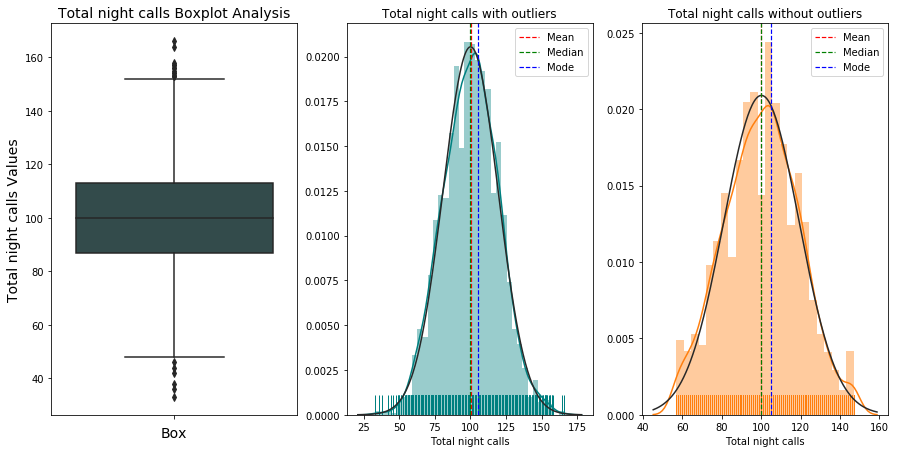

Total night charge column --------------------------------------------------------------------------------
Number of rows with outliers: 22


State International plan Voice mail plan  Number vmail messages  \
94     NJ                 No              No                      0   
201    VA                 No              No                      0   
361    WI                Yes              No                      0   
698    WY                 No              No                      0   
729    PA                 No              No                      0   

     Total day minutes  Total day calls  Total day charge  Total eve minutes  \
94               162.6               83             27.64              152.3   
201              198.5               99             33.75              267.8   
361              165.4              107             28.12              196.0   
698              146.3               84             24.87              255.9   
729              215.9               67             36.70              217.0   

     Total eve calls  Total eve charge  Total night minutes  \
94               109             12.95                 57.5   
201               60             22.76                354.9   
361              126             16.66                349.2   
698              113             21.75                 45.0   
729              108             18.45                342.8   

     Total night calls  Total night charge  Total intl minutes  \
94                 122                2.59                14.2   
201                 75               15.97                 9.4   
361                110               15.71                 9.6   
698                117                2.03                 8.0   
729                130               15.43                 5.2   

     Total intl calls  Total intl charge  Customer service calls  Churn  
94                  3               3.83                       1  False  
201                 3               2.54                       0   True  
361                 7               2.59                       2  False  
698                12               2.16                       1  False  
729                 2               1.40                       1  False

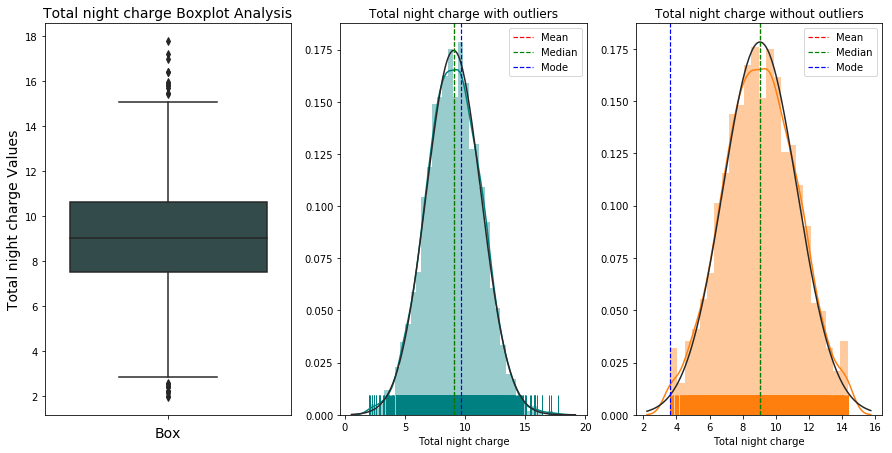

Total intl minutes column --------------------------------------------------------------------------------
Number of rows with outliers: 37


State International plan Voice mail plan  Number vmail messages  \
93     ME                Yes             Yes                     42   
145    KS                 No              No                      0   
176    FL                Yes              No                      0   
251    ID                 No              No                      0   
278    IN                 No             Yes                     21   

     Total day minutes  Total day calls  Total day charge  Total eve minutes  \
93               196.8               89             33.46              254.9   
145              232.1              122             39.46              292.3   
176              226.7               98             38.54              228.1   
251              125.2               99             21.28              205.4   
278               64.6               98             10.98              176.1   

     Total eve calls  Total eve charge  Total night minutes  \
93               122             21.67                138.3   
145              112             24.85                201.2   
176              115             19.39                 73.2   
251              107             17.46                254.4   
278               86             14.97                244.8   

     Total night calls  Total night charge  Total intl minutes  \
93                 126                6.22                20.0   
145                112                9.05                 0.0   
176                 93                3.29                17.6   
251                111               11.45                18.9   
278                 84               11.02                 0.0   

     Total intl calls  Total intl charge  Customer service calls  Churn  
93                  6               5.40                       0   True  
145                 0               0.00                       3  False  
176                 4               4.75                       2   True  
251                 2               5.10                       0  False  
278                 0               0.00                       2  False

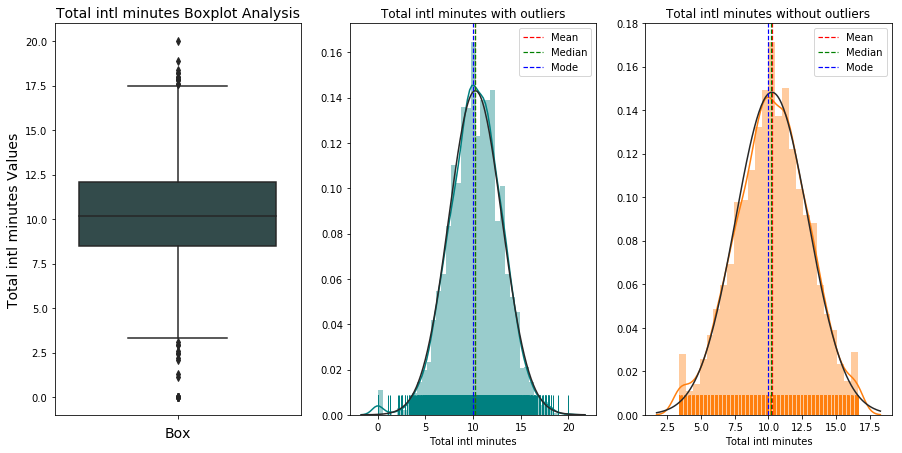

Total intl calls column --------------------------------------------------------------------------------
Number of rows with outliers: 66


State International plan Voice mail plan  Number vmail messages  \
19     AZ                 No              No                      0   
35     MD                Yes             Yes                     41   
125    RI                 No              No                      0   
148    NY                 No             Yes                     36   
151    NM                 No              No                      0   

     Total day minutes  Total day calls  Total day charge  Total eve minutes  \
19               183.0              112             31.11               72.9   
35               173.1               85             29.43              203.9   
125              226.0              112             38.42              248.5   
148              115.6              111             19.65              237.7   
151              214.3              145             36.43              268.5   

     Total eve calls  Total eve charge  Total night minutes  \
19                99              6.20                181.8   
35               107             17.33                122.2   
125              118             21.12                140.5   
148               94             20.20                169.9   
151              135             22.82                241.2   

     Total night calls  Total night charge  Total intl minutes  \
19                  78                8.18                 9.5   
35                  78                5.50                14.6   
125                142                6.32                 6.9   
148                103                7.65                 9.9   
151                 92               10.85                10.8   

     Total intl calls  Total intl charge  Customer service calls  Churn  
19                 19               2.57                       0  False  
35                 15               3.94                       0   True  
125                11               1.86                       1  False  
148                12               2.67                       2  False  
151                13               2.92                       1  False

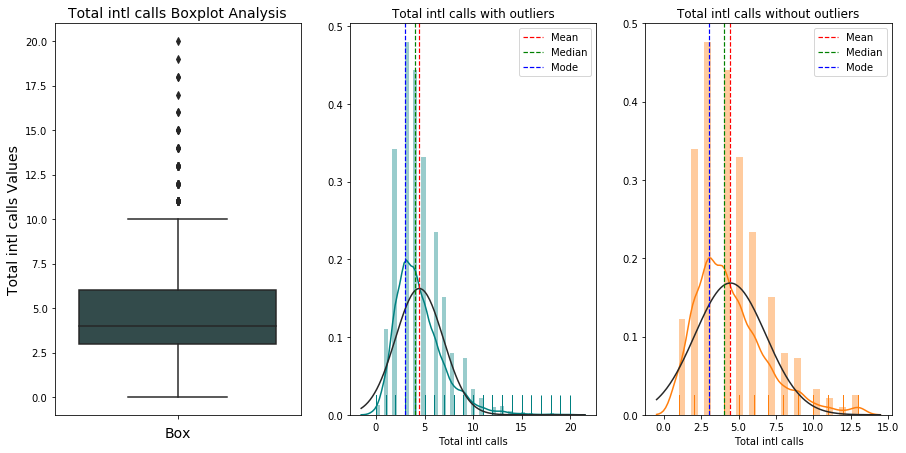

Total intl charge column --------------------------------------------------------------------------------
Number of rows with outliers: 40


State International plan Voice mail plan  Number vmail messages  \
93     ME                Yes             Yes                     42   
145    KS                 No              No                      0   
176    FL                Yes              No                      0   
251    ID                 No              No                      0   
278    IN                 No             Yes                     21   

     Total day minutes  Total day calls  Total day charge  Total eve minutes  \
93               196.8               89             33.46              254.9   
145              232.1              122             39.46              292.3   
176              226.7               98             38.54              228.1   
251              125.2               99             21.28              205.4   
278               64.6               98             10.98              176.1   

     Total eve calls  Total eve charge  Total night minutes  \
93               122             21.67                138.3   
145              112             24.85                201.2   
176              115             19.39                 73.2   
251              107             17.46                254.4   
278               86             14.97                244.8   

     Total night calls  Total night charge  Total intl minutes  \
93                 126                6.22                20.0   
145                112                9.05                 0.0   
176                 93                3.29                17.6   
251                111               11.45                18.9   
278                 84               11.02                 0.0   

     Total intl calls  Total intl charge  Customer service calls  Churn  
93                  6               5.40                       0   True  
145                 0               0.00                       3  False  
176                 4               4.75                       2   True  
251                 2               5.10                       0  False  
278                 0               0.00                       2  False

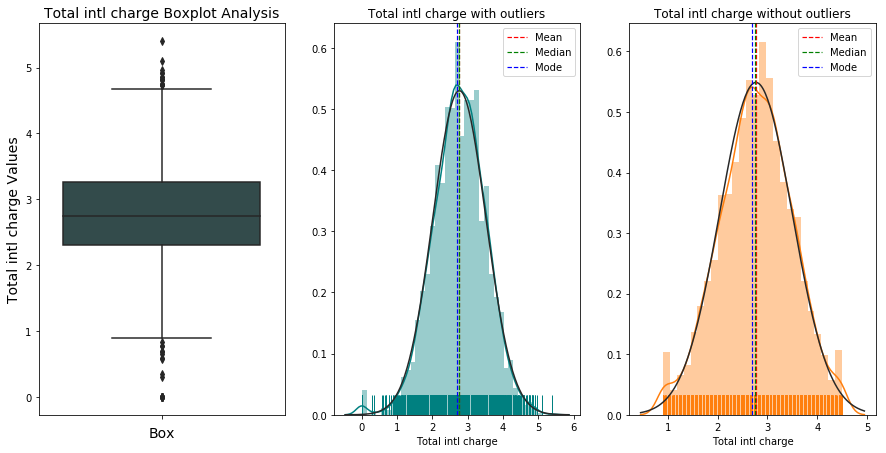

Customer service calls column --------------------------------------------------------------------------------
Number of rows with outliers: 210


State International plan Voice mail plan  Number vmail messages  \
12    IA                 No              No                      0   
18    CO                 No              No                      0   
45    WY                 No              No                      0   
58    TX                 No              No                      0   
65    NY                 No              No                      0   

    Total day minutes  Total day calls  Total day charge  Total eve minutes  \
12              120.7               70             20.52              307.2   
18               62.4               89             10.61              169.9   
45              151.0               83             25.67              219.7   
58              178.9              101             30.41              169.1   
65               61.6              117             10.47               77.1   

    Total eve calls  Total eve charge  Total night minutes  Total night calls  \
12               76             26.11                203.0                 99   
18              121             14.44                209.6                 64   
45              116             18.67                203.9                127   
58              110             14.37                148.6                100   
65               85              6.55                173.0                 99   

    Total night charge  Total intl minutes  Total intl calls  \
12                9.14                13.1                 6   
18                9.43                 5.7                 6   
45                9.18                 9.7                 3   
58                6.69                13.8                 3   
65                7.79                 8.2                 7   

    Total intl charge  Customer service calls  Churn  
12               3.54                       4  False  
18               1.54                       5   True  
45               2.62                       5   True  
58               3.73                       4   True  
65               2.21                       4   True

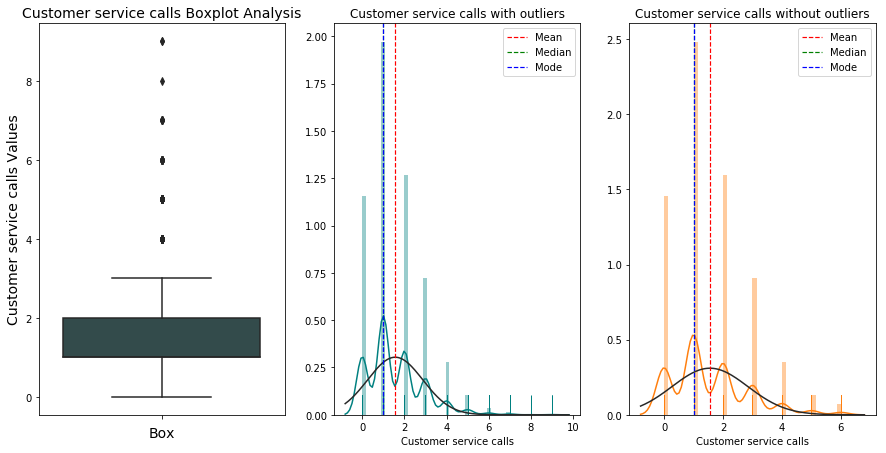

In [28]:
# Outlier, distribution for columns with outliers
print('Box plot, distribution of columns with and without outliers'); print('--'*60)

boxplotcolumns = int_col[2:-1]
for cols in boxplotcolumns:
    Q3 = data[cols].quantile(0.75)
    Q1 = data[cols].quantile(0.25)
    IQR = Q3 - Q1

    print(f'{cols.capitalize()} column', '--'*40)
    print(f'Number of rows with outliers: {len(data.loc[(data[cols] < (Q1 - 1.5 * IQR)) | (data[cols] > (Q3 + 1.5 * IQR))])}')
    display(data.loc[(data[cols] < (Q1 - 1.5 * IQR)) | (data[cols] > (Q3 + 1.5 * IQR))].head())
    odp_plots(data, cols)

del cols, IQR, boxplotcolumns

In [29]:
# Outliers removal
def outliers(df, col, method = 'quantile', strategy = 'median', drop = True):
    if method == 'quantile':
        Q3, Q2, Q1 = df[col].quantile([0.75, 0.50, 0.25])
        IQR = Q3 - Q1
        upper_lim = Q3 + (1.5 * IQR)
        lower_lim = Q1 - (1.5 * IQR)
        print(f'Outliers for {col} are: {sorted([x for x in df[col] if x < lower_lim or x > upper_lim])}\n')
        if strategy == 'median':
            df.loc[(df[col] < lower_lim) | (df[col] > upper_lim), col] = Q2
        else:
            df.loc[(df[col] < lower_lim) | (df[col] > upper_lim), col] = df[col].mean()
    elif method == 'stddev':
        col_mean, col_std, Q2 = df[col].mean(), df[col].std(), df[col].median()
        cut_off = col_std * 3
        lower_lim, upper_lim = col_mean - cut_off, col_mean + cut_off
        print(f'Outliers for {col} are: {sorted([x for x in df[col] if x < lower_lim or x > upper_lim])}\n')
        if strategy == 'median':
            df.loc[(df[col] < lower_lim) | (df[col] > upper_lim), col] = Q2
        else:
            df.loc[(df[col] < lower_lim) | (df[col] > upper_lim), col] = col_mean
    else:
      print('Please pass the correct method, strategy or drop criteria')

In [30]:
# Replacing outliers with mean values in these columns
print('Replacing outliers with mean values using quantile method'); print('--'*60)

data_im = data.copy(deep = True)
outliers_cols = ['Total day minutes','Total day calls','Total day charge','Total eve minutes','Total eve calls',
                 'Total eve charge','Total night minutes','Total night calls','Total night charge',
                 'Total intl minutes', 'Total intl calls','Total intl charge']

for col in outliers_cols:
    outliers(data_im, col, method = 'quantile', strategy = 'mean')

print('\nColumn for which outliers where replaced with mean using quantile method: \n', outliers_cols)


Replacing outliers with mean values using quantile method
------------------------------------------------------------------------------------------------------------------------
Outliers for Total day minutes are: [0.0, 0.0, 2.6, 7.8, 7.9, 12.5, 17.6, 18.9, 19.5, 27.0, 29.9, 30.9, 34.0, 326.3, 328.1, 329.8, 335.5, 337.4, 345.3, 346.8, 350.8]

Outliers for Total day calls are: [0, 0, 36, 40, 42, 42, 44, 44, 44, 45, 45, 45, 156, 157, 158, 158, 158, 160]

Outliers for Total day charge are: [0.0, 0.0, 0.44, 1.33, 1.34, 2.13, 2.99, 3.21, 3.32, 4.59, 5.08, 5.25, 5.78, 55.47, 55.78, 56.07, 57.04, 57.36, 58.7, 58.96, 59.64]

Outliers for Total eve minutes are: [0.0, 31.2, 42.2, 42.5, 43.9, 49.2, 52.9, 56.0, 58.6, 58.9, 339.9, 341.3, 347.3, 348.5, 350.9, 354.2, 363.7]

Outliers for Total eve calls are: [0, 12, 36, 42, 43, 44, 45, 46, 46, 155, 155, 156, 157, 159, 170]

Outliers for Total eve charge are: [0.0, 2.65, 3.59, 3.61, 3.73, 4.18, 4.5, 4.76, 4.98, 5.01, 28.89, 29.01, 29.52, 29.62, 29.83

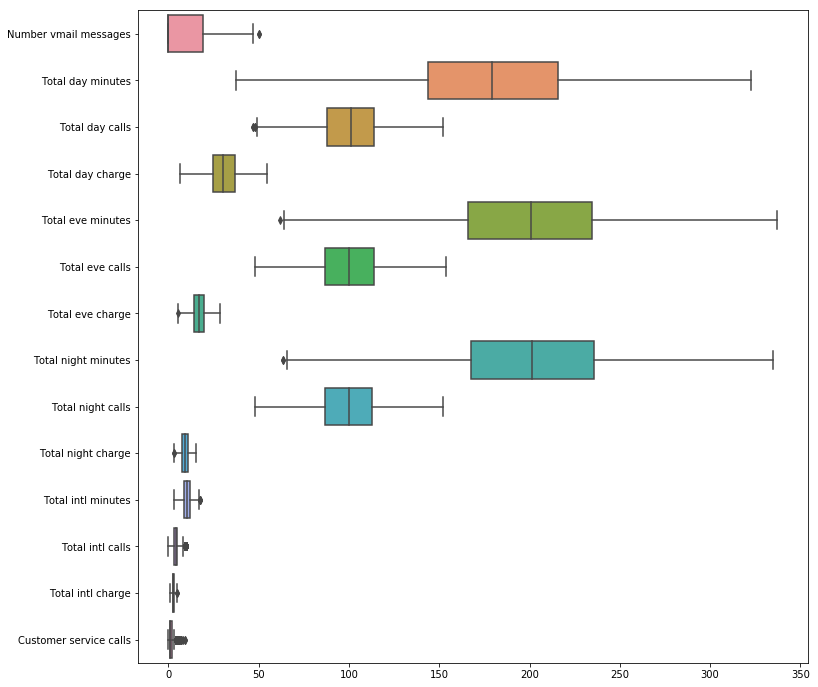

In [31]:
# After removing the outliers
fig = plt.figure(figsize = (12, 12))
ax = sns.boxplot(data = data_im[int_col[2:-1]], orient = 'h')



Observation 8 - Comments from numerical columns
  * Used quantile method to check outliers in numerical column. It appears that there are outliers in each of the numerical columns.
  * Used mean for  removing outliers below 25% percentile and above 75% percentile will bring the numerical columns to almost normal distribution.

In [32]:
data_im.head()

State International plan Voice mail plan  Number vmail messages  \
0    KS                 No             Yes                     25   
1    OH                 No             Yes                     26   
2    NJ                 No              No                      0   
3    OH                Yes              No                      0   
4    OK                Yes              No                      0   

   Total day minutes  Total day calls  Total day charge  Total eve minutes  \
0              265.1            110.0             45.07              197.4   
1              161.6            123.0             27.47              195.5   
2              243.4            114.0             41.38              121.2   
3              299.4             71.0             50.90               61.9   
4              166.7            113.0             28.34              148.3   

   Total eve calls  Total eve charge  Total night minutes  Total night calls  \
0             99.0             16.78                244.7               91.0   
1            103.0             16.62                254.4              103.0   
2            110.0             10.30                162.6              104.0   
3             88.0              5.26                196.9               89.0   
4            122.0             12.61                186.9              121.0   

   Total night charge  Total intl minutes  Total intl calls  \
0               11.01                10.0               3.0   
1               11.45                13.7               3.0   
2                7.32                12.2               5.0   
3                8.86                 6.6               7.0   
4                8.41                10.1               3.0   

   Total intl charge  Customer service calls  Churn  
0               2.70                       1  False  
1               3.70                       1  False  
2               3.29                       0  False  
3               1.78                       2  False  
4               2.73                       3  False

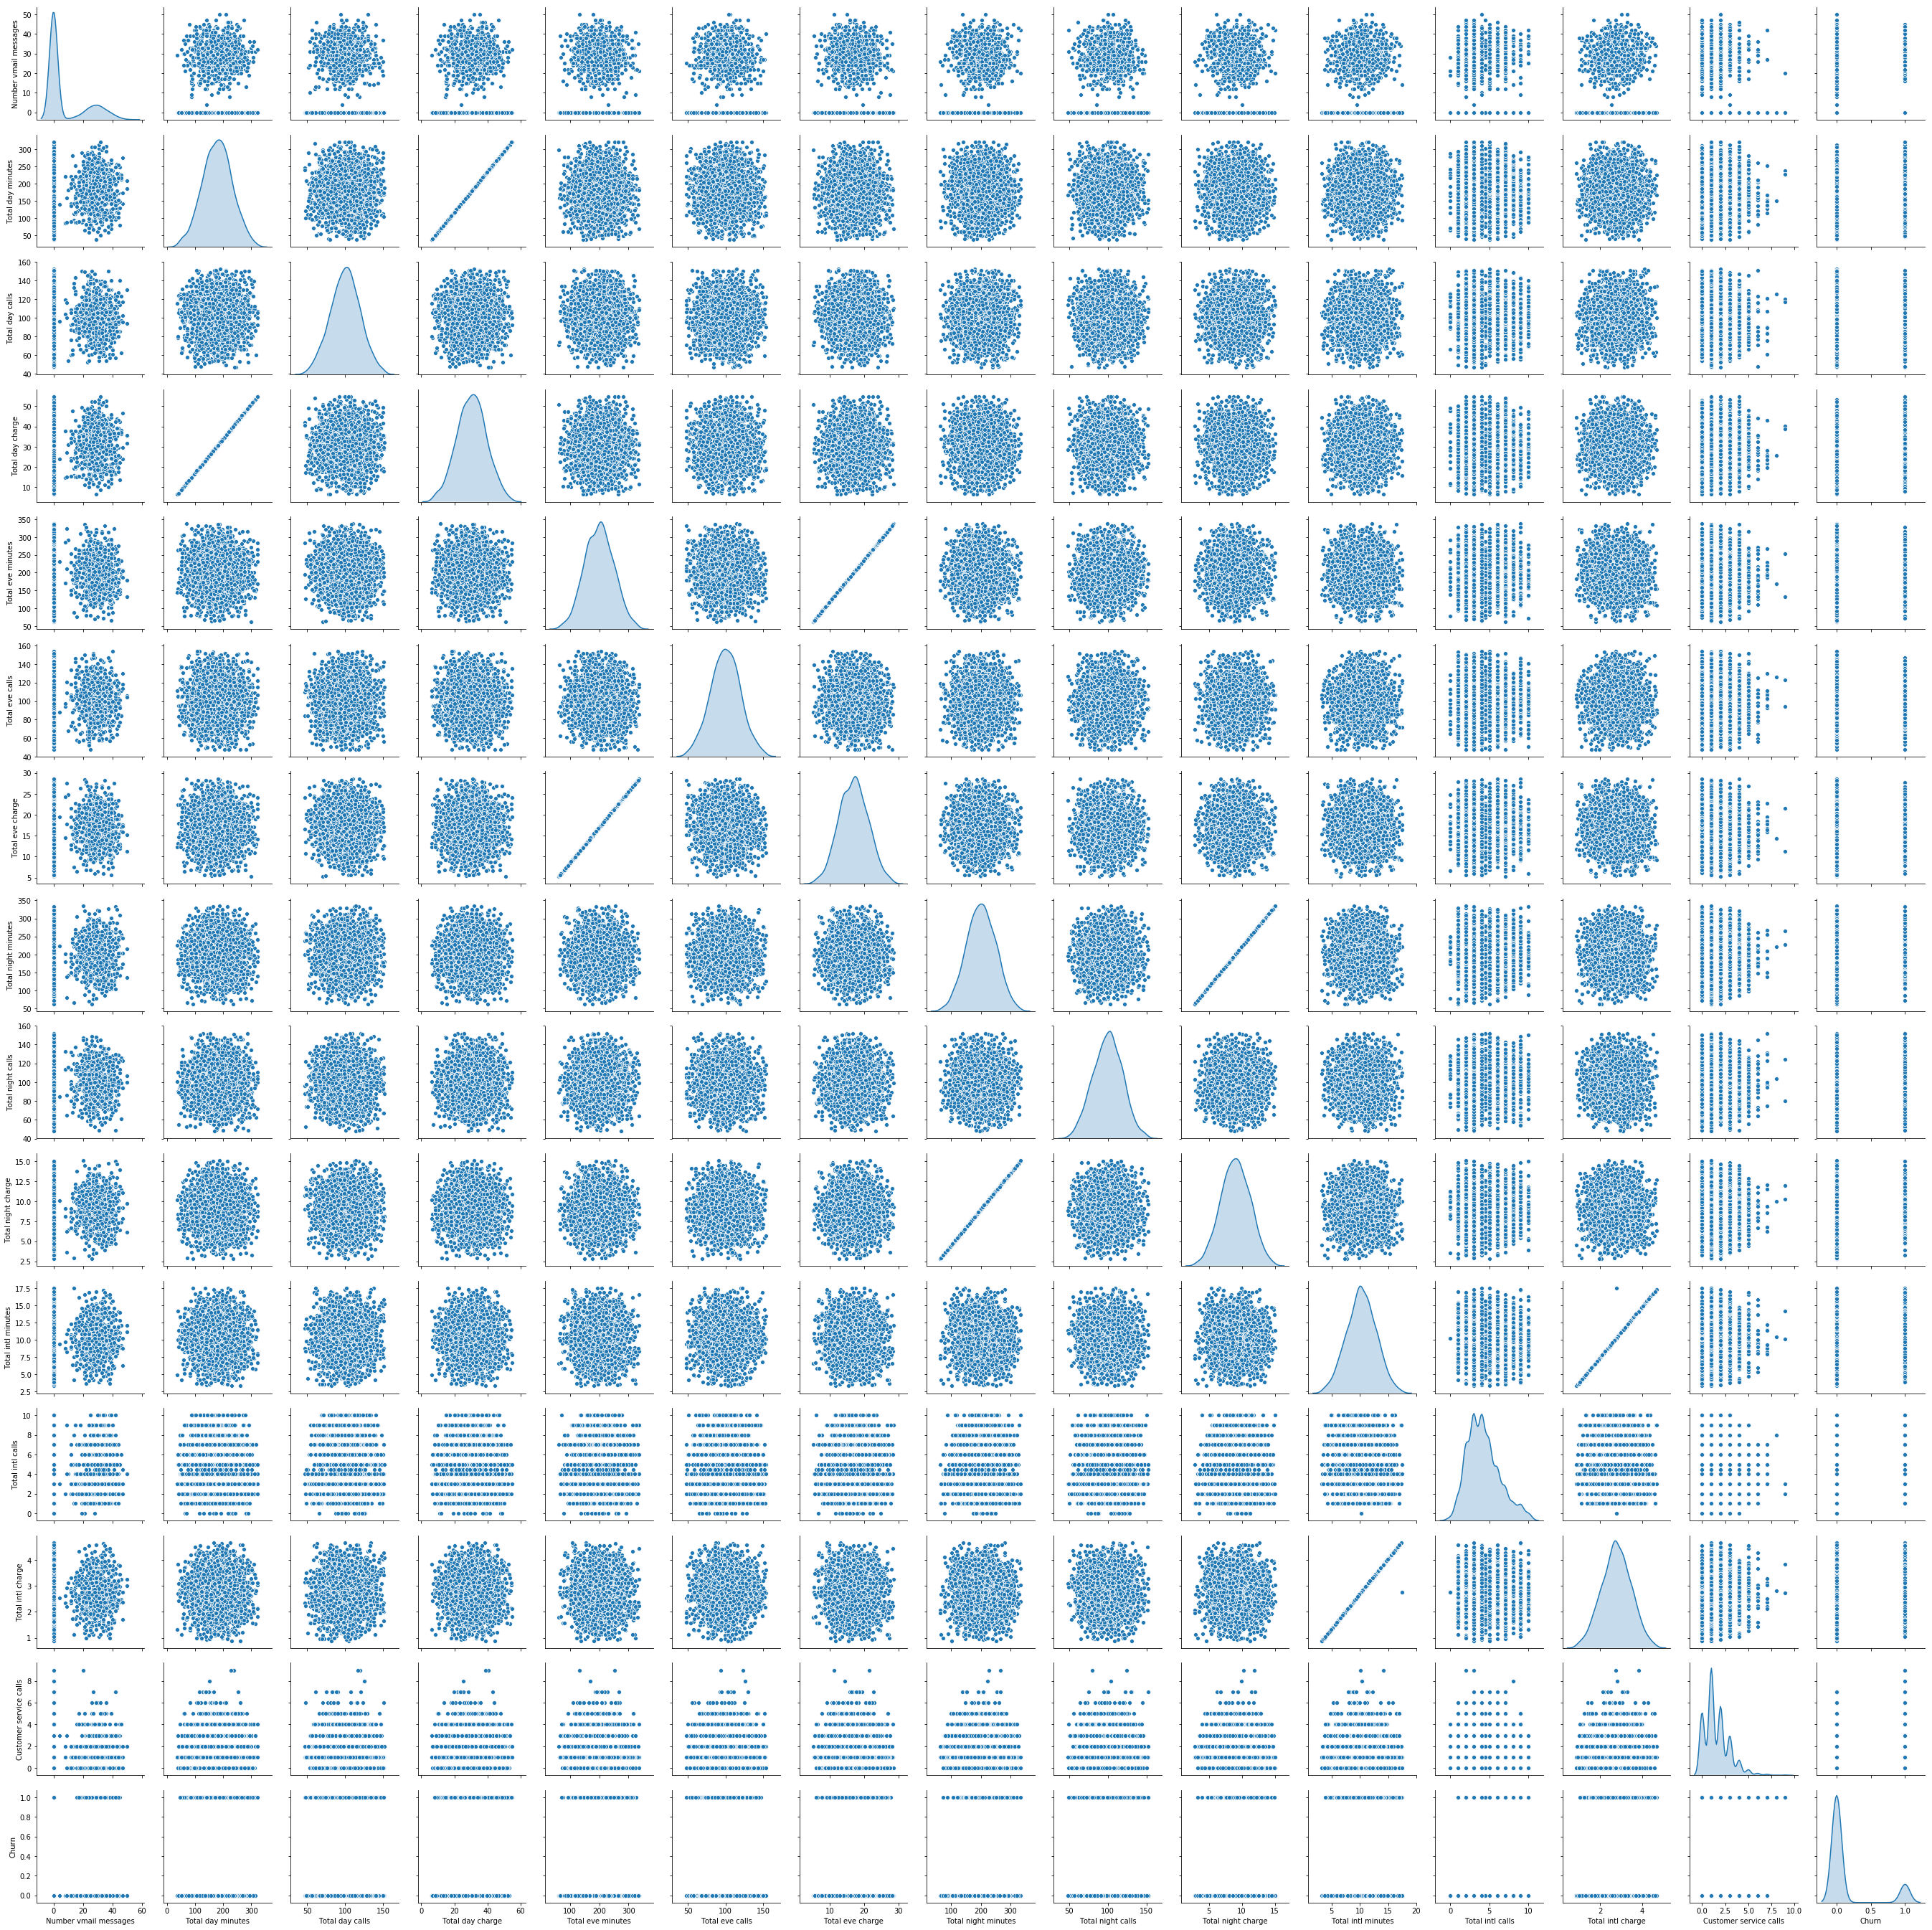

In [33]:
sns.pairplot(data_im, diag_kind = 'kde')

# Multicollinearity

In [34]:
# Correlation matrix for all variables
def correlation_matrix(df, threshold = 0.8):
    corr = df.corr()
    mask = np.zeros_like(corr, dtype = np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize = (15, 7.2))
    cmap = sns.diverging_palette(220, 10, as_cmap = True)
    sns.heatmap(corr, mask = mask, cmap = cmap, square = True, linewidths = .5, cbar_kws = {"shrink": .5})#, annot = True)
    ax.set_title('Correlation Matrix of Data')

    # Filter for correlation value greater than threshold
    sort = corr.abs().unstack()
    sort = sort.sort_values(kind = "quicksort", ascending = False)
    display(sort[(sort > threshold) & (sort < 1)])

Total day minutes    Total day charge       1.000000
Total day charge     Total day minutes      1.000000
Total eve minutes    Total eve charge       1.000000
Total eve charge     Total eve minutes      1.000000
Total night minutes  Total night charge     0.999999
Total night charge   Total night minutes    0.999999
Total intl charge    Total intl minutes     0.995527
Total intl minutes   Total intl charge      0.995527
dtype: float64

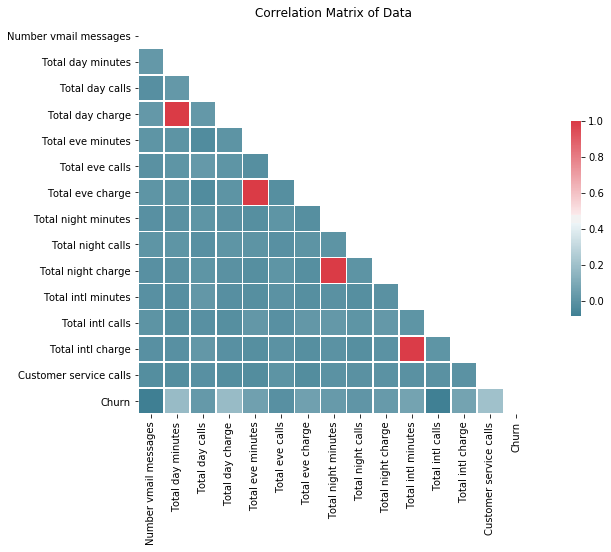

In [35]:
# Correlation matrix
correlation_matrix(data_im, 0.8)


In [36]:
# Absolute correlation of independent variables with the target variable
absCorrwithDep = []
#allVars = data_im.drop('Churn', axis = 1).columns

for var in int_col[2:-1]:
    absCorrwithDep.append(abs(data_im['Churn'].corr(data_im[var])))

display(pd.DataFrame([int_col[2:-1], absCorrwithDep], index = ['Variable', 'Correlation']).T.\
        sort_values('Correlation', ascending = False))

Variable Correlation
13  Customer service calls     0.20259
1        Total day minutes    0.178314
3         Total day charge    0.178314
0    Number vmail messages   0.0864741
11        Total intl calls   0.0817107
10      Total intl minutes   0.0746981
12       Total intl charge   0.0733495
4        Total eve minutes   0.0605749
6         Total eve charge   0.0605622
7      Total night minutes   0.0363493
9       Total night charge   0.0363466
2          Total day calls   0.0304302
8        Total night calls   0.0124656
5          Total eve calls  0.00664159

In [37]:
# Drop the highly correlated features 
data_im = data_im.drop(['Total day charge','Total eve charge','Total night charge','Total intl charge'],axis=1)

Observation 9 - Correlation Matrix
  * Total day minutes & Total day charge ; Total eve minutes & Total eve charge ;Total night minutes & Total night charge ; Total intl charge & Total intl minutes ; columns are highly correlated with each other.
  
  
  * columns that are dropped to avoid Mutlicollinearity
  ['Total day charge','Total eve charge','Total night charge','Total intl charge']

  
  * Customer service calls, Total day minutes ,Total day charge  are few columns which have a relatively strong correlation with Target column.

# One hot encoding


In [38]:
data_enc = pd.get_dummies(data_im[cat_col],drop_first=True)

In [39]:
data_enc.shape

(2666, 52)

In [40]:
data_enc.head()

State_AL  State_AR  State_AZ  State_CA  State_CO  State_CT  State_DC  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   State_DE  State_FL  State_GA  ...  State_TX  State_UT  State_VA  State_VT  \
0         0         0         0  ...         0         0         0         0   
1         0         0         0  ...         0         0         0         0   
2         0         0         0  ...         0         0         0         0   
3         0         0         0  ...         0         0         0         0   
4         0         0         0  ...         0         0         0         0   

   State_WA  State_WI  State_WV  State_WY  International plan_Yes  \
0         0         0         0         0                       0   
1         0         0         0         0                       0   
2         0         0         0         0                       0   
3         0         0         0         0                       1   
4         0         0         0         0                       1   

   Voice mail plan_Yes  
0                    1  
1                    1  
2                    0  
3                    0  
4                    0  

[5 rows x 52 columns]

In [41]:
data_im = data_im.drop(cat_col, axis=1)

In [42]:
data_im.head()

Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1            110.0   
1                     26              161.6            123.0   
2                      0              243.4            114.0   
3                      0              299.4             71.0   
4                      0              166.7            113.0   

   Total eve minutes  Total eve calls  Total night minutes  Total night calls  \
0              197.4             99.0                244.7               91.0   
1              195.5            103.0                254.4              103.0   
2              121.2            110.0                162.6              104.0   
3               61.9             88.0                196.9               89.0   
4              148.3            122.0                186.9              121.0   

   Total intl minutes  Total intl calls  Customer service calls  Churn  
0                10.0               3.0                       1  False  
1                13.7               3.0                       1  False  
2                12.2               5.0                       0  False  
3                 6.6               7.0                       2  False  
4                10.1               3.0                       3  False

In [43]:
data_im.shape

(2666, 11)

In [44]:
data_new = pd.concat([data_enc,data_im],axis=1)

In [45]:
data_new.head()

State_AL  State_AR  State_AZ  State_CA  State_CO  State_CT  State_DC  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   State_DE  State_FL  State_GA  ...  Total day minutes  Total day calls  \
0         0         0         0  ...              265.1            110.0   
1         0         0         0  ...              161.6            123.0   
2         0         0         0  ...              243.4            114.0   
3         0         0         0  ...              299.4             71.0   
4         0         0         0  ...              166.7            113.0   

   Total eve minutes  Total eve calls  Total night minutes  Total night calls  \
0              197.4             99.0                244.7               91.0   
1              195.5            103.0                254.4              103.0   
2              121.2            110.0                162.6              104.0   
3               61.9             88.0                196.9               89.0   
4              148.3            122.0                186.9              121.0   

   Total intl minutes  Total intl calls  Customer service calls  Churn  
0                10.0               3.0                       1  False  
1                13.7               3.0                       1  False  
2                12.2               5.0                       0  False  
3                 6.6               7.0                       2  False  
4                10.1               3.0                       3  False  

[5 rows x 63 columns]

# MODEL BUILDING 

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score

In [47]:
X = data_new.drop(columns= ['Churn'],axis=1)
y = data_new['Churn']

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 10)

# Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
model = LogisticRegression(solver='liblinear')

In [51]:
model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [52]:
model.score(X_train,y_train)

0.8762057877813505

In [53]:
model.score(X_test,y_test)

0.845

In [54]:
y_pred = model.predict(X_test)

In [55]:
# Other scores
accuracy = accuracy_score(y_test, y_pred).round(3)
            
precision = precision_score(y_test, y_pred).round(3)
            
recall = recall_score(y_test, y_pred).round(3)

In [57]:
print('-'*20)
print('Accuracy Score: {0:.3f}'.format(accuracy))
print('Precision Score : {0:.3f}'.format(precision))
print('Recall Score : {0:.3f}'.format(recall))

--------------------
Accuracy Score: 0.845
Precision Score : 0.474
Recall Score : 0.148


In [58]:
from sklearn.metrics import classification_report

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.86      0.97      0.91       678
        True       0.47      0.15      0.23       122

    accuracy                           0.84       800
   macro avg       0.67      0.56      0.57       800
weighted avg       0.80      0.84      0.81       800



# Cross validation

In [60]:
from sklearn.model_selection import cross_val_score

In [61]:
scores = cross_val_score(model,X_train,y_train,cv=5,scoring='accuracy')

In [62]:
scores

array([0.88235294, 0.86595174, 0.86327078, 0.86327078, 0.8766756 ])

In [63]:
scores.mean()

0.8703043683961521

# Gradient Boosting

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

In [65]:
gbc_model = GradientBoostingClassifier(n_estimators = 50)

In [66]:
# fit the model
gbc_model.fit(X_train, y_train)

# Get predictions
y_true, y_pred = y_test, gbc_model.predict(X_test)

# Evaluate train and test scores
train_ = gbc_model.score(X_train, y_train)
test_ = gbc_model.score(X_test, y_test)
                      

In [67]:
# Other scores
accuracy = accuracy_score(y_true, y_pred).round(3)
            
precision = precision_score(y_true, y_pred).round(3)
            
recall = recall_score(y_true, y_pred).round(3)

In [68]:
print('-'*20)
print('Training Score: {0:.3f}'.format(train_))
print('Test Score: {0:.3f}'.format(test_))
            
print('Accuracy Score: {0:.3f}'.format(accuracy))
print('Precision Score : {0:.3f}'.format(precision))
print('Recall Score : {0:.3f}'.format(recall))

--------------------
Training Score: 0.965
Test Score: 0.934
Accuracy Score: 0.934
Precision Score : 0.916
Recall Score : 0.623


In [69]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

       False       0.94      0.99      0.96       678
        True       0.92      0.62      0.74       122

    accuracy                           0.93       800
   macro avg       0.93      0.81      0.85       800
weighted avg       0.93      0.93      0.93       800

